<a href="https://colab.research.google.com/github/dyjdlopez/dsp/blob/main/notebooks/dsp_04v01_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 04: Sound Manipulation
$_{\text{©D.J. Lopez | 2022 | Digital Signals Processing}}$

In this laboratory we will be doing basic operations on audio signals. Specifically we will look at:
* Sound Addition
* Custom Signals
* White Noise

# Sounds in ThinkDSP

In [ ]:
!git clone https://github.com/AllenDowney/ThinkDSP.git

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2469, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 2469 (delta 23), reused 20 (delta 9), pack-reused 2421
Receiving objects: 100% (2469/2469), 215.71 MiB | 18.53 MiB/s, done.
Resolving deltas: 100% (1343/1343), done.
Checking out files: 100% (302/302), done.


In [ ]:
import os
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

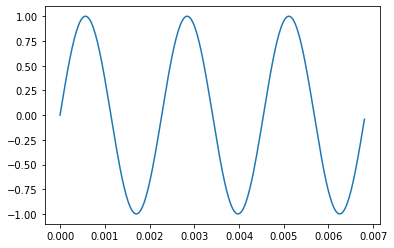

Writing sound.wav


In [ ]:
# Generate wave
sin1 = thinkdsp.SinSignal(freq=440, amp=1) # Where freq is the frequency and amp is the amplitude of the sine wave
wave1 = sin1.make_wave(duration=2, start=0, framerate=44100) # Turn the sin wave into an audio wave

# Plot wave
period = sin1.period
segment1 = wave1.segment(start=0, duration=period*3)
segment1.plot()
pyplot.show()

# Play wave
wave1.play()
IPython.display.Audio('sound.wav') # This is required on Google Colab due to compatibility issues

Writing sound.wav


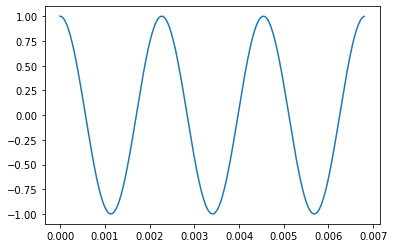

In [ ]:
# Plot another wave
cos = thinkdsp.CosSignal(freq=440, amp=1) 
wave2 = cos.make_wave(duration=2, start=0, framerate=44100)

# Plot wave
period2 = cos.period
segment2 = wave2.segment(start=0, duration=period2*3)
segment2.plot()
wave2.play()
IPython.display.Audio('sound.wav')

Writing sound.wav


ThinkDSP/code/thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


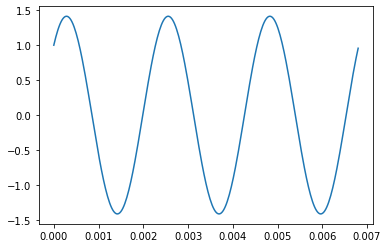

In [ ]:
## Add the two signals
# Plot another wave
sig1 = sin1+cos
wave3 = sig1.make_wave(duration=2, start=0, framerate=44100)

# Plot wave
period3 = sig1.period
segment3 = wave3.segment(start=0, duration=period3*3)
segment3.plot()
wave3.play()
IPython.display.Audio('sound.wav')

In [ ]:
# Plot another wave
sin2 = thinkdsp.SinSignal(freq=660, amp=1) 
sig2 = sin1 + sin2
wave4 = sig2.make_wave(duration=2, start=0, framerate=44100)

# Plot wave
period4 = sig2.period
segment4 = wave4.segment(start=0, duration=period4*3)
segment4.plot()
wave4.play()
IPython.display.Audio('sound.wav')

TypeError: ignored

Writing sound.wav


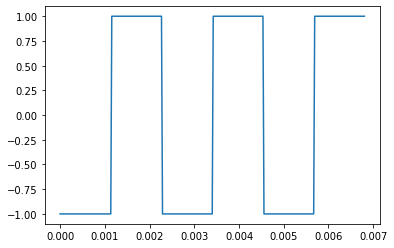

In [ ]:
# Plot another wave
square = thinkdsp.SquareSignal(freq=440) 
sq_wave = square.make_wave(duration=2, start=0, framerate=44100)

# Plot wave
sq_period = square.period
sq_seg = sq_wave.segment(start=0, duration=sq_period*3)
sq_seg.plot()
sq_wave.play()
IPython.display.Audio('sound.wav')

# Custom Signals

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Fs = 16e3 ## Sampling frequency
clip = lambda Fs,n: int(Fs*n)

def disc_range(samp_freq, m, n, clip_sec):
  N = np.arange(0, Fs+1, m/n) # set the range w.r.t the freq
  N = N[0:clip(Fs,clip_sec)] # clip to the max seconds
  return N

def make_plot(N,sig, window=100):
  plt.figure(figsize=(8,5))
  markerline, stemlines, baseline = plt.stem(
      N[0:window], sig[0:window], 
      linefmt='blue', markerfmt='o', basefmt='black',
      use_line_collection=True)
  markerline.set_markerfacecolor('none')

  
sin = lambda n,theta: np.sin(n+theta)
square = lambda n, theta: sig.square(n+theta)

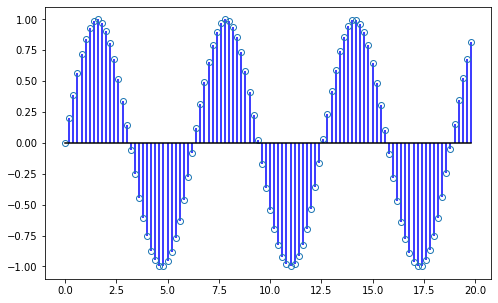

In [ ]:
N = disc_range(Fs, m=1, n=5, clip_sec=2)
sin_sig1 = sin(N,0)

make_plot(N,sin_sig1)
IPython.display.Audio(sin_sig1, rate=Fs)

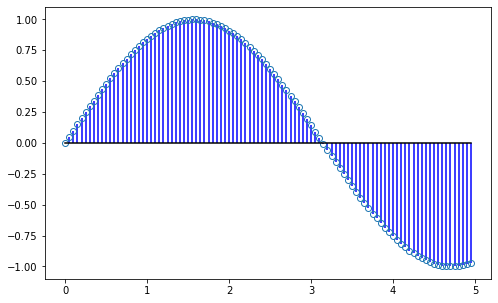

In [ ]:
N = disc_range(Fs, m=1, n=20, clip_sec=2)
sin_sig2 = sin(N,0)

make_plot(N,sin_sig2)
IPython.display.Audio(sin_sig1, rate=Fs)

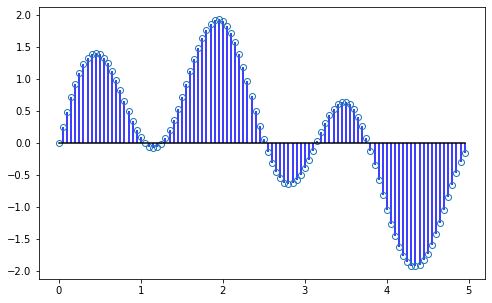

In [ ]:
comb1_sig = sin_sig1+sin_sig2
make_plot(N,comb1_sig)
IPython.display.Audio(comb1_sig, rate=Fs)

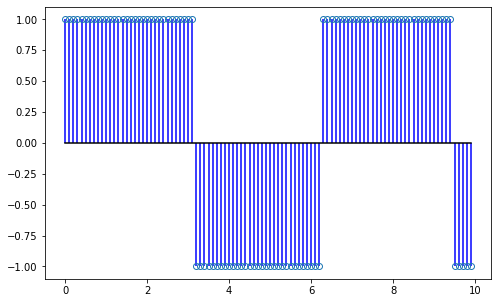

In [ ]:
N = disc_range(Fs, m=1, n=10, clip_sec=2)
square_sig1 = square(N,0)

make_plot(N,square_sig1)
IPython.display.Audio(square_sig1, rate=Fs)

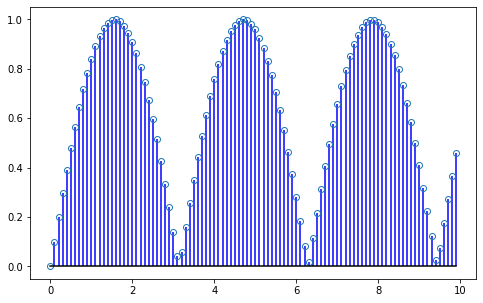

In [ ]:
rect_sig1 = sin_sig1 * square_sig1
make_plot(N,rect_sig1)
IPython.display.Audio(rect_sig1, rate=Fs)

In [ ]:
def gaussian_noise(x, mu, sigma, amp=1):
  R = len(x)
  noise=  amp*np.random.normal(mu, sigma, R)
  noise_sig = x + noise
  return noise_sig

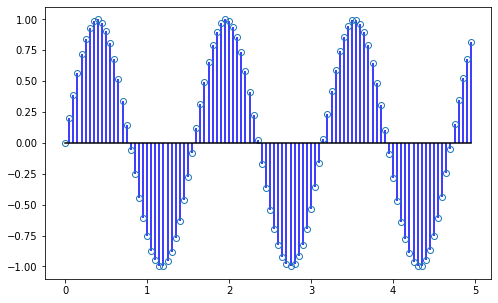

In [ ]:
make_plot(N,sin_sig1)
IPython.display.Audio(sin_sig1, rate=Fs)

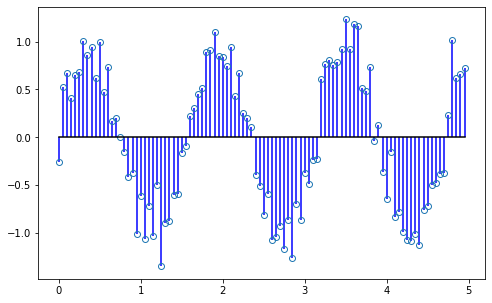

In [ ]:
noise_sin = gaussian_noise(sin_sig1, mu=0 , sigma=1, amp=0.2)
make_plot(N,noise_sin)
IPython.display.Audio(noise_sin, rate=Fs)

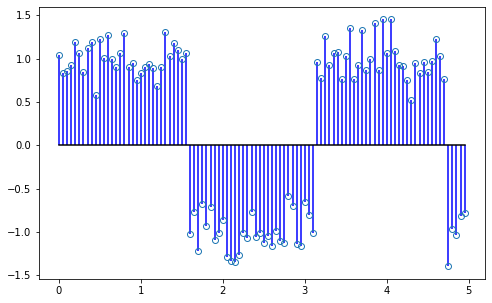

In [ ]:
noise_sq = gaussian_noise(square_sig1, mu=0 , sigma=1, amp=0.2)
make_plot(N,noise_sq)
IPython.display.Audio(noise_sq, rate=Fs)